#PANDAS - DATA CLEANING  - EUROPE & GAS PRICES

Import libraries

In [72]:
import pandas as pd
import requests
import os

In [73]:
repo = "https://github.com/michaluhrinek/Pandas/blob/main/PandasMaster%20Pro%3A%20Complete%20Data%20Analysis/EU_DATA_2%20(1).csv"

In [74]:
# Direct access to your CSV file (if you have one)
# Use the raw GitHub URL to get the raw file content
url = "https://raw.githubusercontent.com/michaluhrinek/Pandas/main/PandasMaster%20Pro%3A%20Complete%20Data%20Analysis/EU_DATA_2%20(1).csv"

try:
    # Read the CSV directly from the raw URL
    df = pd.read_csv(url)
    print("Successfully loaded data:")
    display(df.head())

except Exception as e:
    print(f"Error reading data from URL: {e}")

Successfully loaded data:


,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Albania,2021-S1,0.00,e,NaN
1,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Albania,2021-S2,0.00,e,NaN
2,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Albania,2022-S1,0.00,e,NaN
3,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Austria,2007-S2,16.95,NaN,NaN
4,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Austria,2008-S1,16.27,NaN,NaN


In [75]:
df.head()

,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Albania,2021-S1,0.00,e,NaN
1,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Albania,2021-S2,0.00,e,NaN
2,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Albania,2022-S1,0.00,e,NaN
3,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Austria,2007-S2,16.95,NaN,NaN
4,ESTAT:NRG_PC_202(1.0),21/05/25 23:00:00,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,Austria,2008-S1,16.27,NaN,NaN


In [76]:
# Basic overview
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57340 entries, 0 to 57339
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     57340 non-null  object 
 1   LAST UPDATE  57340 non-null  object 
 2   freq         57340 non-null  object 
 3   product      57340 non-null  object 
 4   nrg_cons     57340 non-null  object 
 5   unit         57340 non-null  object 
 6   tax          57340 non-null  object 
 7   currency     57340 non-null  object 
 8   geo          57340 non-null  object 
 9   TIME_PERIOD  57340 non-null  object 
 10  OBS_VALUE    57142 non-null  float64
 11  OBS_FLAG     1134 non-null   object 
 12  CONF_STATUS  180 non-null    object 
dtypes: float64(1), object(12)
memory usage: 5.7+ MB
None
          OBS_VALUE
count  57142.000000
mean      39.611859
std      245.707554
min        0.000000
25%        0.063400
50%        5.042300
75%       17.720000
max     5023.190000
DATAFLOW           0
LA

#Basic Data Cleaning

In [80]:
#Get rid of duplicates
df = df.drop_duplicates()

In [81]:
##Remove Empty Values (Records with Missing Data)
df.dropna()

,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS


In [82]:
# Convert to datetime and extract date part
df['LAST UPDATE'] = pd.to_datetime(df['LAST UPDATE'], errors='coerce').dt.date

In [83]:
#Standardize Text Columns (Optional)
df['geo'] = df['geo'].str.strip().str.upper()

#MANAGEING COLUMNS AND DATA (FORMATING AND COLUMNS SELECTION)

In [84]:
# Ensure OBS_VALUE is numeric
df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], errors='coerce')

# Remove rows with missing or zero OBS_VALUE
df = df[df['OBS_VALUE'].notnull() & (df['OBS_VALUE'] > 0)]

# Extract year from TIME_PERIOD (assumes format like '2021-S1')
df['YEAR'] = df['TIME_PERIOD'].str[:4]

# Group by country and year, calculate mean
df_new = df.groupby(['geo', 'YEAR'])['OBS_VALUE'].mean().reset_index()

# Rename the column for clarity
df_new.rename(columns={'OBS_VALUE': 'AVG_OBS_VALUE'}, inplace=True)

# Show result
print(df_new.head())

       geo  YEAR  AVG_OBS_VALUE
0  AUSTRIA  2007       7.392676
1  AUSTRIA  2008       7.232911
2  AUSTRIA  2009       7.522215
3  AUSTRIA  2010       7.304623
4  AUSTRIA  2011       8.457031


#Advanced Cleaning Methods

The outliers are the data points in your OBS_VALUE (gas price) column that are significantly different from the majority of the data. The code identifies several such data points using different statistical methods (IQR, Z-score, and Modified Z-score). You can see the first few rows of the data points identified as outliers by each method in the output of that cell.

In [85]:
import numpy as np
from scipy import stats


column_to_check = 'OBS_VALUE' # Or 'gas_price'

# Call the advanced_outlier_detection function
iqr_outliers, z_outliers, modified_z_outliers = advanced_outlier_detection(df, column=column_to_check)

# Display the outliers found by each method (optional)
print("\nOutliers found by IQR method:")
display(iqr_outliers.head())

print("\nOutliers found by Z-score method:")
display(z_outliers.head())

print("\nOutliers found by Modified Z-score method:")
display(modified_z_outliers.head())

# You can then decide how to handle these outliers (e.g., remove them, transform them, investigate them)


🔍 Advanced Outlier Detection for OBS_VALUE:
  IQR method: 3236 outliers
  Z-score method: 650 outliers
  Modified Z-score: 4286 outliers

Outliers found by IQR method:


,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS,YEAR
239,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,DENMARK,2022-S2,57.8873,NaN,NaN,2022
240,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,DENMARK,2023-S1,45.9819,NaN,NaN,2023
335,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,GREECE,2022-S2,44.4122,NaN,NaN,2022
563,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,IRELAND,2023-S2,45.5032,NaN,NaN,2023
619,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,LIECHTENSTEIN,2022-S2,51.8084,NaN,NaN,2022



Outliers found by Z-score method:


,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS,YEAR
1550,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,National currency,HUNGARY,2007-S2,2679.4900,NaN,NaN,2007
1551,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,National currency,HUNGARY,2008-S1,2850.4700,NaN,NaN,2008
1552,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,National currency,HUNGARY,2008-S2,3228.1400,NaN,NaN,2008
1553,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,National currency,HUNGARY,2009-S1,3878.7264,NaN,NaN,2009
1554,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,National currency,HUNGARY,2009-S2,3587.3300,NaN,NaN,2009



Outliers found by Modified Z-score method:


,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS,YEAR
34,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2023-S1,43.3257,NaN,NaN,2023
35,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2023-S2,41.0360,NaN,NaN,2023
36,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2024-S1,38.3186,NaN,NaN,2024
98,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,BELGIUM,2022-S2,37.8523,NaN,NaN,2022
238,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,DENMARK,2022-S1,41.9111,NaN,NaN,2022


What this data tels you:

Which specific records in your dataset have unusually high or low gas prices compared to the rest of the data, according to different statistical definitions of an outlier.
The country and time period associated with these extreme gas price values.

#Data Profilling

Data profiling is a process of examining, analyzing, and creating useful summaries of a dataset. Think of it as getting to know your data intimately before you start cleaning, transforming, or analyzing it in depth.

In [95]:
# 2. DATA PROFILING WITH PANDAS PROFILING ALTERNATIVE
def comprehensive_data_profile(df):
    """Comprehensive data profiling"""
    print("\n📊 COMPREHENSIVE DATA PROFILE")
    print("="*50)

    profile = {
        'shape': df.shape,
        'memory_usage_mb': df.memory_usage(deep=True).sum() / 1024**2,
        'missing_data': df.isnull().sum().to_dict(),
        'data_types': df.dtypes.to_dict(),
        'numeric_summary': df.describe().to_dict() if len(df.select_dtypes(include=[np.number]).columns) > 0 else {},
        'categorical_summary': {}
    }

    # Categorical analysis
    for col in df.select_dtypes(include=['object', 'category']).columns:
        # Ensure the column is not the 'LAST UPDATE' column with date objects, or handle it specifically if needed
        # For now, let's handle the potential date keys in value_counts().to_dict()
        top_values_dict = df[col].value_counts().head().to_dict()
        # Convert keys to string if they are not
        top_values_str_keys = {str(key): value for key, value in top_values_dict.items()}

        profile['categorical_summary'][col] = {
            'unique_count': df[col].nunique(),
            'top_values': top_values_str_keys, # Use the dictionary with string keys
            'cardinality': df[col].nunique() / len(df) * 100
        }

    return profile
# Make sure the comprehensive_data_profile function from cell zayhYrGJb1US is defined and accessible

# Call the comprehensive_data_profile function with the current DataFrame
data_profile = comprehensive_data_profile(df)

# Convert data types to strings for JSON serialization
if 'data_types' in data_profile:
    data_profile['data_types'] = {col: str(dtype) for col, dtype in data_profile['data_types'].items()}

# Display the generated data profile as JSON
import json
print(json.dumps(data_profile, indent=4))


📊 COMPREHENSIVE DATA PROFILE
{
    "shape": [
        56854,
        14
    ],
    "memory_usage_mb": 47.925607681274414,
    "missing_data": {
        "DATAFLOW": 0,
        "LAST UPDATE": 0,
        "freq": 0,
        "product": 0,
        "nrg_cons": 0,
        "unit": 0,
        "tax": 0,
        "currency": 0,
        "geo": 0,
        "TIME_PERIOD": 0,
        "OBS_VALUE": 0,
        "OBS_FLAG": 55900,
        "CONF_STATUS": 56854,
        "YEAR": 0
    },
    "data_types": {
        "DATAFLOW": "object",
        "LAST UPDATE": "object",
        "freq": "object",
        "product": "object",
        "nrg_cons": "object",
        "unit": "object",
        "tax": "object",
        "currency": "object",
        "geo": "object",
        "TIME_PERIOD": "object",
        "OBS_VALUE": "float64",
        "OBS_FLAG": "object",
        "CONF_STATUS": "object",
        "YEAR": "object"
    },
    "numeric_summary": {
        "OBS_VALUE": {
            "count": 56854.0,
            "mean": 

# 3. AUTOMATED DATA QUALITY SCORING

Automated data quality scoring is a process of programmatically assessing the quality of your dataset based on predefined rules or metrics. It provides quantitative scores that summarize different aspects of data quality.

In [96]:
def calculate_data_quality_score(df):
    """Calculate overall data quality score"""
    print("\n🎯 DATA QUALITY SCORING")
    print("="*30)

    scores = {}

    # Completeness Score (0-100)
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    completeness = ((total_cells - missing_cells) / total_cells) * 100
    scores['completeness'] = completeness

    # Consistency Score (based on data types)
    expected_numeric = ['OBS_VALUE']
    consistency = 100
    for col in expected_numeric:
        if col in df.columns:
            if not pd.api.types.is_numeric_dtype(df[col]):
                consistency -= 20
    scores['consistency'] = max(0, consistency)

    # Validity Score (realistic value ranges)
    validity = 100
    if 'OBS_VALUE' in df.columns:
        negative_values = (df['OBS_VALUE'] < 0).sum()
        extreme_values = (df['OBS_VALUE'] > df['OBS_VALUE'].quantile(0.99) * 5).sum()
        validity_penalty = (negative_values + extreme_values) / len(df) * 100
        validity = max(0, 100 - validity_penalty)
    scores['validity'] = validity

    # Overall Score
    overall_score = np.mean(list(scores.values()))
    scores['overall'] = overall_score

    print(f"Completeness: {completeness:.2f}%")
    print(f"Consistency: {consistency:.2f}%")
    print(f"Validity: {validity:.2f}%")
    print(f"Overall Quality Score: {overall_score:.2f}%")

    return scores

In [98]:
# Make sure the calculate_data_quality_score function from cell nwcPVipphAnB is defined and accessible

# Call the calculate_data_quality_score function with the current DataFrame
data_quality_scores = calculate_data_quality_score(df)

# The function prints the scores, but you can also access them from the returned dictionary
# print("\nReturned scores dictionary:")
# print(data_quality_scores)


🎯 DATA QUALITY SCORING
Completeness: 85.83%
Consistency: 100.00%
Validity: 100.00%
Overall Quality Score: 95.28%


# 4. INTELLIGENT IMPUTATION STRATEGIES

What is Imputation?

Imputation is the process of replacing missing values in a dataset with substituted values. Instead of simply removing rows or columns with missing data (which can lead to loss of valuable information), imputation attempts to fill in the gaps.

What makes imputation "Intelligent"?

Basic imputation methods might replace missing values with a simple statistic like the mean, median, or mode of the existing data in that column. However, "intelligent" or more advanced imputation strategies use more sophisticated techniques to estimate the missing values based on the relationships within the data.

In [100]:
def intelligent_imputation(df):
    """Smart missing value imputation"""
    print("\n🔧 INTELLIGENT MISSING VALUE IMPUTATION")
    print("="*45)

    df_imputed = df.copy()

    # For OBS_VALUE: use group-based median imputation
    if 'OBS_VALUE' in df.columns and df['OBS_VALUE'].isnull().sum() > 0:
        # Impute by country and year median
        if 'geo' in df.columns and 'YEAR' in df.columns:
            df_imputed['OBS_VALUE'] = df_imputed.groupby(['geo', 'YEAR'])['OBS_VALUE'].transform(
                lambda x: x.fillna(x.median())
            )
            # If still missing, use overall median
            df_imputed['OBS_VALUE'].fillna(df_imputed['OBS_VALUE'].median(), inplace=True)
            print("✅ OBS_VALUE imputed using group-based median")

    # For categorical variables: use mode
    categorical_cols = df_imputed.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df_imputed[col].isnull().sum() > 0:
            mode_value = df_imputed[col].mode()[0] if len(df_imputed[col].mode()) > 0 else 'Unknown'
            df_imputed[col].fillna(mode_value, inplace=True)
            print(f"✅ {col} imputed using mode: {mode_value}")

    return df_imputed

In [101]:
# Make sure the intelligent_imputation function from cell QeqJI1D2htEl is defined and accessible

# Call the intelligent_imputation function with the current DataFrame
df_imputed = intelligent_imputation(df)

# Display the head of the imputed DataFrame
print("\nHead of the DataFrame after imputation:")
display(df_imputed.head())

# Display the missing value counts after imputation
print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())


🔧 INTELLIGENT MISSING VALUE IMPUTATION
✅ OBS_FLAG imputed using mode: e
✅ CONF_STATUS imputed using mode: Unknown

Head of the DataFrame after imputation:


,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS,YEAR
3,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2007-S2,16.95,e,Unknown,2007
4,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2008-S1,16.27,e,Unknown,2008
5,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2008-S2,17.11,e,Unknown,2008
6,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2009-S1,18.03,e,Unknown,2009
7,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2009-S2,17.23,e,Unknown,2009



Missing values after imputation:
DATAFLOW       0
LAST UPDATE    0
freq           0
product        0
nrg_cons       0
unit           0
tax            0
currency       0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
OBS_FLAG       0
CONF_STATUS    0
YEAR           0
dtype: int64


# 5. DATA VALIDATION RULES

Data validation rules are predefined conditions or constraints that your data must meet to be considered accurate, consistent, and reliable. These rules are often based on business requirements, domain knowledge, or common sense. They are used to check the integrity and quality of individual data points or relationships between data points.

Data validation is crucial for several reasons:

1.   Ensuring Accuracy: It helps identify and flag or remove data that is    factually incorrect or doesn't meet expected standards.
2.   Maintaining Consistency: Validation rules can enforce consistency in data formatting, units, and values across the dataset.

1.   Improving Reliability: By ensuring data adheres to defined rules, you increase the overall reliability of your dataset and the analysis performed on it.
2.   Preventing Errors in Analysis/Models: Using validated data reduces the risk of errors or misleading results in your statistical analysis, visualizations, or machine learning models. Invalid data can lead to incorrect conclusions.

What are the data used for?

1.   Compliance and Governance: In many industries, data validation is required to comply with regulations and internal data governance policies.
2.   Identifying Data Entry Issues: Validation can help pinpoint issues in data collection or data entry processes by highlighting records that fail validation checks.





In [107]:
def apply_business_rules(df):
    """Apply domain-specific business rules"""
    print("\n⚖️ APPLYING BUSINESS RULES")
    print("="*30)

    df_validated = df.copy()
    original_len = len(df_validated)

    # Rule 1: Prices must be positive
    if 'OBS_VALUE' in df_validated.columns:
        before = len(df_validated)
        df_validated = df_validated[df_validated['OBS_VALUE'] > 0]
        removed = before - len(df_validated)
        print(f"✅ Rule 1 - Positive prices only: Removed {removed} rows")


    # Rule 2: Reasonable price ranges (0.01 to 1000 per unit)
    if 'OBS_VALUE' in df_validated.columns:
        before = len(df_validated)
        df_validated = df_validated[
            (df_validated['OBS_VALUE'] >= 0.01) &
            (df_validated['OBS_VALUE'] <= 1000)
        ]
        removed = before - len(df_validated)
        print(f"✅ Rule 2 - Reasonable price range: Removed {removed} rows")

    # Rule 3: Valid years (2000-2030)
    if 'YEAR' in df_validated.columns:
        # Convert YEAR to numeric, coercing errors to NaN
        df_validated['YEAR'] = pd.to_numeric(df_validated['YEAR'], errors='coerce')
        # Drop rows where YEAR could not be converted to a number
        df_validated.dropna(subset=['YEAR'], inplace=True)

        before = len(df_validated)
        df_validated = df_validated[
            (df_validated['YEAR'] >= 2000) &
            (df_validated['YEAR'] <= 2030)
        ]
        removed = before - len(df_validated)
        print(f"✅ Rule 3 - Valid year range: Removed {removed} rows")

    return df_validated

In [108]:
# Make sure the apply_business_rules function from cell EiICrRXcic8R is defined and accessible

# Call the apply_business_rules function with the imputed DataFrame
df_validated = apply_business_rules(df_imputed)

# Display the head of the validated DataFrame
print("\nHead of the DataFrame after applying business rules:")
display(df_validated.head())

# Display the number of rows before and after validation
print(f"\nOriginal number of rows: {len(df_imputed)}")
print(f"Number of rows after validation: {len(df_validated)}")
print(f"Number of rows removed by validation rules: {len(df_imputed) - len(df_validated)}")


⚖️ APPLYING BUSINESS RULES
✅ Rule 1 - Positive prices only: Removed 0 rows
✅ Rule 2 - Reasonable price range: Removed 561 rows
✅ Rule 3 - Valid year range: Removed 0 rows

Head of the DataFrame after applying business rules:


,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS,YEAR
3,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2007-S2,16.95,e,Unknown,2007
4,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2008-S1,16.27,e,Unknown,2008
5,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2008-S2,17.11,e,Unknown,2008
6,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2009-S1,18.03,e,Unknown,2009
7,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2009-S2,17.23,e,Unknown,2009



Original number of rows: 56854
Number of rows after validation: 56293
Number of rows removed by validation rules: 561


# 6. CREATE DATA CLEANING REPORT

A data cleaning report is a document or summary that details the steps taken to clean and prepare a dataset for analysis. It outlines the issues found during data profiling and validation, the strategies used to address them (like handling missing values or outliers), and the impact of these cleaning steps on the dataset.

What is a Data Cleaning Report Used For?

Data cleaning reports are important for several reasons in data science and analysis workflows:

Transparency and Documentation: They provide a clear record of the cleaning process, making your work transparent and reproducible. Anyone using the cleaned data can understand how it was processed.
Communication: Reports help communicate the data quality issues and the steps taken to resolve them to stakeholders, team members, or clients who might not be directly involved in the cleaning process.
Decision Making: The report can inform decisions about the suitability of the data for specific analyses or models. If significant amounts of data were removed or heavily imputed, it might affect the reliability of downstream results.
Identifying Process Issues: By documenting the types and frequency of data quality issues, reports can help identify problems in the data collection or data entry processes that need to be addressed at the source.
Audit Trail: In regulated environments, a data cleaning report serves as an audit trail of the data manipulation process.

In [109]:
def generate_cleaning_report(df_original, df_clean):
    """Generate comprehensive cleaning report"""
    print("\n📋 DATA CLEANING REPORT")
    print("="*30)

    report = {
        'original_shape': df_original.shape,
        'final_shape': df_clean.shape,
        'rows_removed': df_original.shape[0] - df_clean.shape[0],
        'data_reduction_pct': ((df_original.shape[0] - df_clean.shape[0]) / df_original.shape[0]) * 100,
        'memory_saved_mb': (df_original.memory_usage(deep=True).sum() - df_clean.memory_usage(deep=True).sum()) / 1024**2,
        'missing_values_before': df_original.isnull().sum().sum(),
        'missing_values_after': df_clean.isnull().sum().sum(),
        'data_types_optimized': len(df_clean.select_dtypes(include=['category']).columns)
    }

    print(f"Original dataset: {report['original_shape'][0]:,} rows × {report['original_shape'][1]} columns")
    print(f"Final dataset: {report['final_shape'][0]:,} rows × {report['final_shape'][1]} columns")
    print(f"Rows removed: {report['rows_removed']:,} ({report['data_reduction_pct']:.2f}%)")
    print(f"Memory saved: {report['memory_saved_mb']:.2f} MB")
    print(f"Missing values reduced: {report['missing_values_before']:,} → {report['missing_values_after']:,}")
    print(f"Data types optimized: {report['data_types_optimized']} columns")

    return report

In [111]:
generate_cleaning_report(df_original=df, df_clean=df_validated)


📋 DATA CLEANING REPORT
Original dataset: 56,854 rows × 14 columns
Final dataset: 56,293 rows × 14 columns
Rows removed: 561 (0.99%)
Memory saved: 0.23 MB
Missing values reduced: 112,754 → 0
Data types optimized: 0 columns


{'original_shape': (56854, 14),
 'final_shape': (56293, 14),
 'rows_removed': 561,
 'data_reduction_pct': 0.9867379603897704,
 'memory_saved_mb': np.float64(0.23285770416259766),
 'missing_values_before': np.int64(112754),
 'missing_values_after': np.int64(0),
 'data_types_optimized': 0}

# 7. VISUALIZATION FOR DATA QUALITY

In [114]:
def visualize_data_quality(df_clean):
    """Create visualizations for data quality assessment"""
    print("\n📊 CREATING DATA QUALITY VISUALIZATIONS")
    print("="*40)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Data Quality Assessment', fontsize=16, fontweight='bold')

    # 1. Missing values heatmap
    if df_clean.isnull().sum().sum() > 0:
        missing_data = df_clean.isnull().sum()
        missing_data = missing_data[missing_data > 0]
        axes[0,0].bar(range(len(missing_data)), missing_data.values)
        axes[0,0].set_title('Missing Values by Column')
        axes[0,0].set_xticks(range(len(missing_data)))
        axes[0,0].set_xticklabels(missing_data.index, rotation=45)
    else:
        axes[0,0].text(0.5, 0.5, 'No Missing Values!',
                      ha='center', va='center', transform=axes[0,0].transAxes,
                      fontsize=14, fontweight='bold')
        axes[0,0].set_title('Missing Values Status')

    # 2. Price distribution
    if 'OBS_VALUE' in df_clean.columns:
        df_clean['OBS_VALUE'].hist(bins=50, ax=axes[0,1], alpha=0.7)
        axes[0,1].set_title('Price Distribution')
        axes[0,1].set_xlabel('Price')
        axes[0,1].set_ylabel('Frequency')

    # 3. Data points by country
    if 'geo' in df_clean.columns:
        country_counts = df_clean['geo'].value_counts().head(10)
        axes[1,0].barh(range(len(country_counts)), country_counts.values)
        axes[1,0].set_title('Top 10 Countries by Data Points')
        axes[1,0].set_yticks(range(len(country_counts)))
        axes[1,0].set_yticklabels(country_counts.index)

    # 4. Time series coverage
    if 'YEAR' in df_clean.columns:
        year_counts = df_clean['YEAR'].value_counts().sort_index()
        axes[1,1].plot(year_counts.index, year_counts.values, marker='o')
        axes[1,1].set_title('Data Points by Year')
        axes[1,1].set_xlabel('Year')
        axes[1,1].set_ylabel('Number of Records')
        axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("✅ Visualizations created successfully!")

# 8. ENHANCED MAIN PIPELINE

The enhanced_pipeline is designed as a single, comprehensive function that orchestrates several data cleaning and quality assessment steps that you've been working on individually. Think of it as automating and chaining together the process of getting to know your data's quality and preparing it for analysis.
Based on the code in cell mz2e30Rsmmrw, the enhanced_pipeline function performs the following steps in sequence:

Comprehensive Profiling: Runs the comprehensive_data_profile function to get a detailed summary of the data's structure, types, and missing values.
Advanced Outlier Detection: Applies different methods to identify outliers in the OBS_VALUE column.
Intelligent Imputation: Fills in missing values in the DataFrame using the defined intelligent imputation strategies.
Apply Business Rules: Applies the predefined data validation rules to filter or clean data based on domain-specific constraints.
Final Data Quality Scoring: Calculates the data quality scores (completeness, consistency, validity) on the cleaned and validated data.
Generate Cleaning Report: Creates a summary report detailing the impact of the cleaning steps.
Create Visualizations: Generates data quality visualizations (missing values, price distribution, etc.) for the cleaned data.
How and Why We Use It:

We use an enhanced pipeline like this for several reasons in data analysis workflows:

Automation: It automates a series of common data cleaning and assessment tasks, saving you from manually running each step individually.
Reproducibility: By encapsulating the cleaning process in a function, it makes your data cleaning steps reproducible. You can easily apply the same cleaning process to new datasets or share your methodology.
Efficiency: Running the pipeline can be more efficient than manually executing each step, especially for large datasets.
Standardization: It helps standardize your data cleaning process, ensuring that a consistent set of quality checks and cleaning techniques are applied.
Streamlined Workflow: It provides a clear and streamlined workflow for data preparation, making it easier to manage and understand the entire cleaning process.

In [118]:
def enhanced_pipeline(df):
    """Run the enhanced cleaning pipeline"""
    print("🚀 ENHANCED DATA CLEANING PIPELINE")
    print("="*50)

    # Store original for comparison
    df_original = df.copy()

    # Step 1: Comprehensive profiling
    profile = comprehensive_data_profile(df)

    # Step 2: Advanced outlier detection
    if 'OBS_VALUE' in df.columns:
        outliers = advanced_outlier_detection(df)

    # Step 3: Intelligent imputation
    df_imputed = intelligent_imputation(df)

    # Step 4: Apply business rules
    df_validated = apply_business_rules(df_imputed)

    # Step 5: Final data quality scoring
    quality_scores = calculate_data_quality_score(df_validated)

    # Step 6: Generate cleaning report
    report = generate_cleaning_report(df_original, df_validated)

    # Step 7: Create visualizations
    visualize_data_quality(df_validated)

    return df_validated, profile, quality_scores, report

🚀 ENHANCED DATA CLEANING PIPELINE

📊 COMPREHENSIVE DATA PROFILE

🔍 Advanced Outlier Detection for OBS_VALUE:
  IQR method: 3236 outliers
  Z-score method: 650 outliers
  Modified Z-score: 4286 outliers

🔧 INTELLIGENT MISSING VALUE IMPUTATION
✅ OBS_FLAG imputed using mode: e
✅ CONF_STATUS imputed using mode: Unknown

⚖️ APPLYING BUSINESS RULES
✅ Rule 1 - Positive prices only: Removed 0 rows
✅ Rule 2 - Reasonable price range: Removed 561 rows
✅ Rule 3 - Valid year range: Removed 0 rows

🎯 DATA QUALITY SCORING
Completeness: 100.00%
Consistency: 100.00%
Validity: 100.00%
Overall Quality Score: 100.00%

📋 DATA CLEANING REPORT
Original dataset: 56,854 rows × 14 columns
Final dataset: 56,293 rows × 14 columns
Rows removed: 561 (0.99%)
Memory saved: 0.23 MB
Missing values reduced: 112,754 → 0
Data types optimized: 0 columns

📊 CREATING DATA QUALITY VISUALIZATIONS


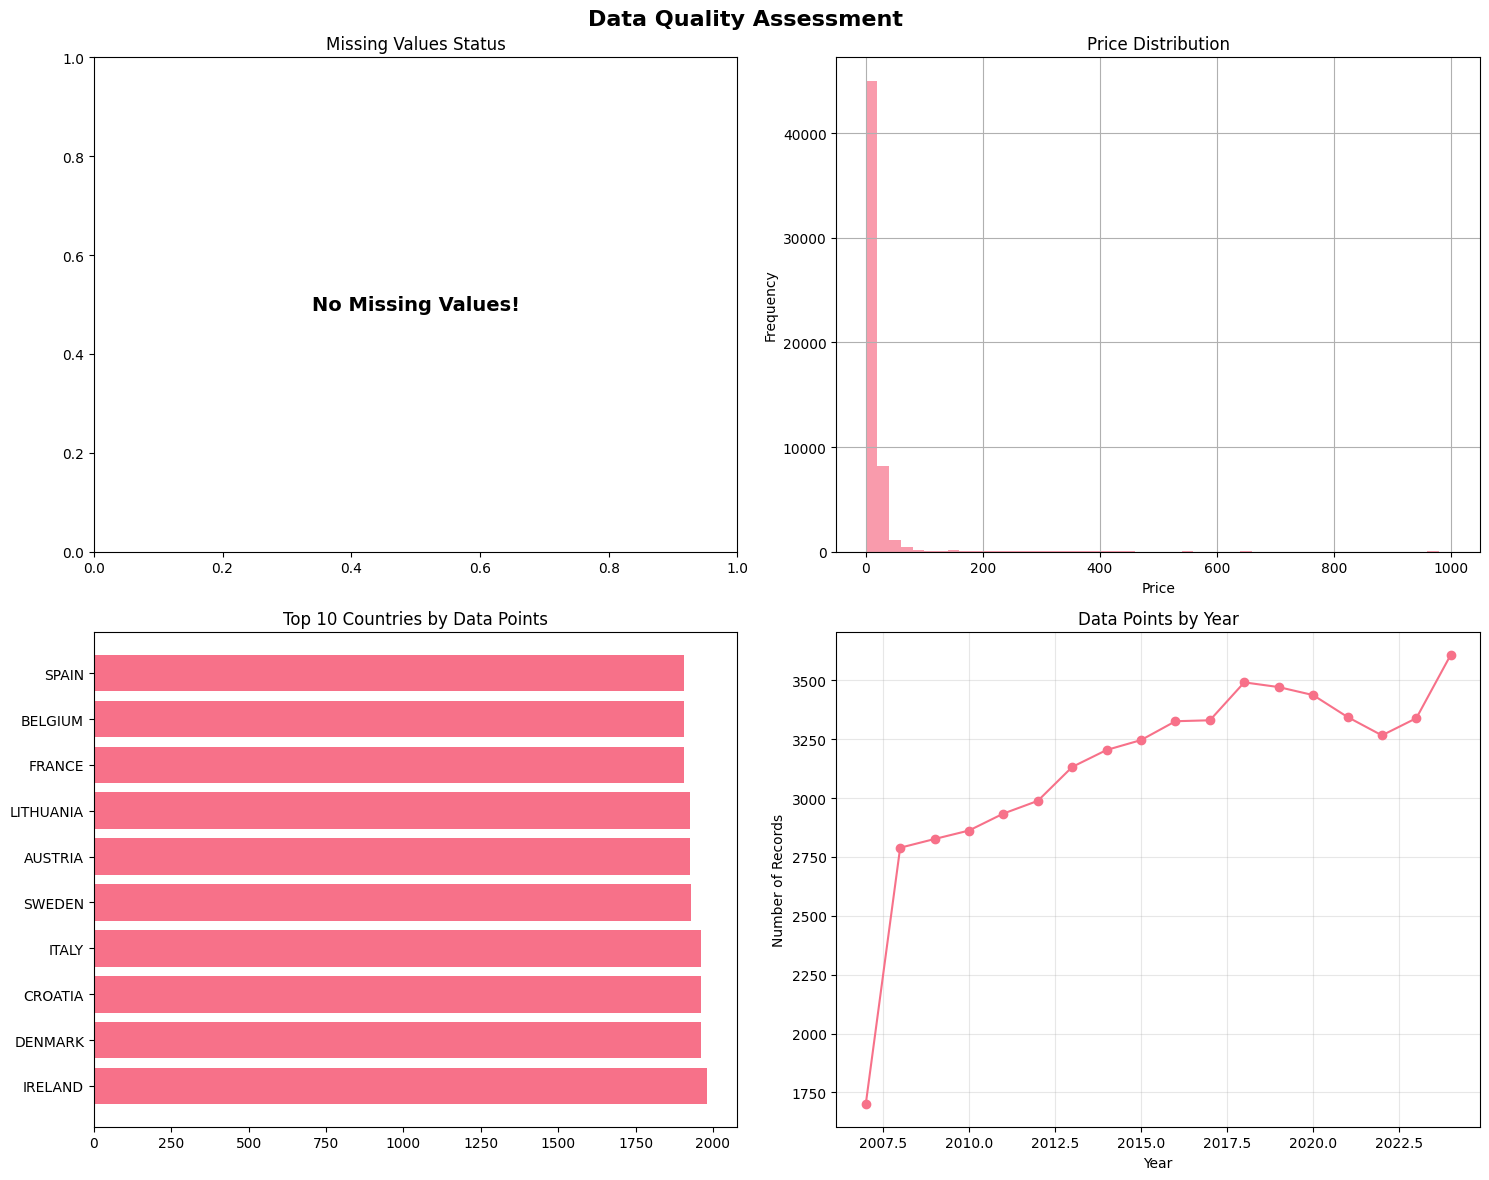

✅ Visualizations created successfully!


(                    DATAFLOW LAST UPDATE                     freq  \
 3      ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 4      ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 5      ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 6      ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 7      ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 ...                      ...         ...                      ...   
 57335  ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 57336  ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 57337  ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 57338  ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 57339  ESTAT:NRG_PC_202(1.0)  2025-05-21  Half-yearly, semesterly   
 
            product                                    nrg_cons  \
 3      Natural gas  Consumption from 20 GJ to 199 GJ - band D2   
 4      Natural gas  Con

In [119]:
enhanced_pipeline(df)

#MEMORY OPTIMALIZATION

 The process of reducing the amount of computer memory (RAM) that your dataset consumes. In data analysis, especially when working with large datasets using libraries like pandas, memory usage can become a significant factor.
 What is Memory Optimization?

Memory optimization in pandas involves storing data in ways that require less memory. For example:

Categorical Data: When a column has a limited number of unique string values (low cardinality), storing it as a category type is much more memory efficient than storing each string repeatedly as an object type. Pandas stores categories internally as integers and keeps a mapping of integers to the unique string values.
Numeric Data Type Downcasting: Using smaller numerical data types (e.g., int16, float32) instead of larger ones (int64, float64) when the range and precision of the data allow can also save memory.


In [123]:
# Check memory usage before optimization
print("Memory usage before optimization:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

# Convert suitable columns to categories - typically columns with low cardinality
# Based on the data profile, these columns have a limited number of unique values:
categorical_cols = ['DATAFLOW', 'freq', 'product', 'nrg_cons', 'unit', 'tax', 'currency', 'geo', 'OBS_FLAG', 'CONF_STATUS']

for col in categorical_cols:
    if col in df.columns: # Check if column exists before converting
        df[col] = df[col].astype('category')

# Also, potentially downcast numeric columns if appropriate
# The 'OBS_VALUE' column is float64, could potentially be float32
# if precision is not critical for your analysis.
# df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], downcast='float')


# Check memory usage after optimization
print("\nMemory usage after optimization:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

# You can also see the dtypes after conversion
print("\nData types after optimization:")
print(df.dtypes)

Memory usage before optimization:
10.36194133758545 MB

Memory usage after optimization:
10.36194133758545 MB

Data types after optimization:
DATAFLOW       category
LAST UPDATE      object
freq           category
product        category
nrg_cons       category
unit           category
tax            category
currency       category
geo            category
TIME_PERIOD      object
OBS_VALUE       float64
OBS_FLAG       category
CONF_STATUS    category
YEAR             object
dtype: object


#Feature Engineering

Feature engineering is the process of using domain knowledge to create new features (variables) from raw data that help improve the performance of machine learning models or provide deeper insights during data analysis.
Essentially, it's about transforming the existing data into a format that is more informative and useful for your goals.
Why do we use Feature Engineering?

Feature engineering is a critical step in the data science process because:

Improves Model Performance: This is one of the primary reasons. Machine learning algorithms often perform better when the input data is well-structured and contains features that capture the underlying patterns and relationships in the data. Raw data might not always be in the most optimal format for an algorithm.
Extracts More Information: You can derive new insights and information from existing features. For example, extracting the Year and Half_Year from a time period allows you to analyze seasonal patterns or yearly trends separately.
Reduces Dimensionality (sometimes): By creating more meaningful features, you can sometimes represent the same information with fewer features, potentially reducing the complexity of your dataset.
Incorporates Domain Knowledge: Your understanding of the data and the problem you're trying to solve (like the EU Gas Price Crisis) is crucial in feature engineering. You can create features that you believe are relevant based on your knowledge, such as creating a feature for periods of known geopolitical events.
Simplifies Models: Sometimes, well-engineered features can allow you to use simpler models to achieve good performance, as the complex relationships are captured in the features themselves.

Think of it like this: If you're trying to predict a house price, instead of just using the raw address, you might engineer features like the number of bedrooms, the square footage, the distance to the nearest school, and the average income of the neighborhood. These engineered features are more directly informative to a model than the raw address string.

In [126]:
# Ensure TIME_PERIOD is datetime type
# Handle the 'YYYY-SX' format manually
def parse_half_year(period):
    if isinstance(period, str) and '-' in period:
        year_str, half_year_str = period.split('-')
        try:
            year = int(year_str)
            # Represent S1 as January 1st and S2 as July 1st of the year
            if half_year_str == 'S1':
                return pd.to_datetime(f'{year}-01-01')
            elif half_year_str == 'S2':
                return pd.to_datetime(f'{year}-07-01')
        except ValueError:
            return pd.NaT # Return Not a Time for unparseable values
    return pd.NaT # Return Not a Time for unexpected formats

df['TIME_PERIOD_dt'] = df['TIME_PERIOD'].apply(parse_half_year)

# Drop rows where TIME_PERIOD could not be parsed
df.dropna(subset=['TIME_PERIOD_dt'], inplace=True)

# Use the new datetime column for time-based features
df['Year'] = df['TIME_PERIOD_dt'].dt.year
df['Half_Year'] = df['TIME_PERIOD'].apply(lambda x: x.split('-')[1] if isinstance(x, str) and '-' in x else None)


# 2. Create Lagged Price Feature (Price from the previous period for each country)
# First, sort the data by country and the new datetime column to ensure correct lag calculation
df = df.sort_values(by=['geo', 'TIME_PERIOD_dt'])
df['Lagged_Price'] = df.groupby('geo')['OBS_VALUE'].shift(1)

# Display the DataFrame with new features
print("DataFrame after Feature Engineering:")
display(df.head())

# Display info to see new columns and their types
print("\nDataFrame Info after Feature Engineering:")
display(df.info())

DataFrame after Feature Engineering:


,DATAFLOW,LAST UPDATE,freq,product,nrg_cons,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS,YEAR,TIME_PERIOD_dt,Year,Half_Year,Lagged_Price
3,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Euro,AUSTRIA,2007-S2,16.9500,NaN,NaN,2007,2007-07-01,2007,S2,NaN
1110,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,National currency,AUSTRIA,2007-S2,16.9500,NaN,NaN,2007,2007-07-01,2007,S2,16.9500
2164,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),All taxes and levies included,Purchasing Power Standard,AUSTRIA,2007-S2,15.8546,NaN,NaN,2007,2007-07-01,2007,S2,16.9500
3183,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),Excluding taxes and levies,Euro,AUSTRIA,2007-S2,12.3800,NaN,NaN,2007,2007-07-01,2007,S2,15.8546
4290,ESTAT:NRG_PC_202(1.0),2025-05-21,"Half-yearly, semesterly",Natural gas,Consumption from 20 GJ to 199 GJ - band D2,Gigajoule (gross calorific value - GCV),Excluding taxes and levies,National currency,AUSTRIA,2007-S2,12.3800,NaN,NaN,2007,2007-07-01,2007,S2,12.3800



DataFrame Info after Feature Engineering:
<class 'pandas.core.frame.DataFrame'>
Index: 56854 entries, 3 to 56721
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATAFLOW        56854 non-null  category      
 1   LAST UPDATE     56854 non-null  object        
 2   freq            56854 non-null  category      
 3   product         56854 non-null  category      
 4   nrg_cons        56854 non-null  category      
 5   unit            56854 non-null  category      
 6   tax             56854 non-null  category      
 7   currency        56854 non-null  category      
 8   geo             56854 non-null  category      
 9   TIME_PERIOD     56854 non-null  object        
 10  OBS_VALUE       56854 non-null  float64       
 11  OBS_FLAG        954 non-null    category      
 12  CONF_STATUS     0 non-null      category      
 13  YEAR            56854 non-null  object        
 14  TIME_PERIOD_dt  

None

#